In [93]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from modules.training_and_fine_tuning.training.train_cnn_model_using_feature_statistics import CnnModelUsingFeatureStatistics
from modules.training_and_fine_tuning.utils.feature_statistics_data_utils import DataUtils
from config.vi_config import VietnameseDatasetConfig
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

In [94]:
def get_n_mfcc_paths(n_mfcc, Config):
    train_path = Config.n_mfcc_config[n_mfcc].train_path
    validation_path = Config.n_mfcc_config[n_mfcc].validation_path
    test_path = Config.n_mfcc_config[n_mfcc].test_path
    return train_path, validation_path, test_path

In [95]:
n_mfcc = 26
train_file_path, val_file_path, test_file_path = get_n_mfcc_paths(n_mfcc, VietnameseDatasetConfig)
print(train_file_path, test_file_path, val_file_path )
x_traincnn, y_train, x_valcnn, y_val, scaler = DataUtils.prepare_data_for_train_model(train_file_path, val_file_path)

./data/VietnameseDataset/features/statistic_features/26/train.csv ./data/VietnameseDataset/features/statistic_features/26/test.csv ./data/VietnameseDataset/features/statistic_features/26/validation.csv


In [96]:
import joblib
def save_scaler(scaler):
    joblib.dump(scaler, 'models/best_fine_tuned_scaler.pkl')

save_scaler(scaler)

In [97]:
x_traincnn.shape

(1159, 307, 1)

In [98]:
y_train.shape

(1159, 7)

In [99]:
x_valcnn.shape

(200, 307, 1)

In [100]:
y_val.shape

(200, 7)

In [101]:
cnn_model_statistics = ModelUtilities.load_model(f'models/best_model_E5.3.keras')

In [102]:
num_layers_to_unfreeze = 2

for layer in cnn_model_statistics.layers:
    layer.trainable = False

for layer in cnn_model_statistics.layers[-num_layers_to_unfreeze:]:
    layer.trainable = True

In [103]:
cnn_model_statistics.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
cnn_model_statistics.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 307, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 307, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 154, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 154, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 154, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 154, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 154, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 154, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 77, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 77, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,261,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,352,967 (5.16 MB)

 Trainable params: 1,799 (7.03 KB)

 Non-trainable params: 1,351,168 (5.15 MB)

In [105]:
import numpy as np
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

y_train_flat = np.array(y_train).flatten()

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_flat),
    y=y_train_flat
)

class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

model_checkpoint = ModelCheckpoint(
    'models/best_fine_tuned_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)
early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max', 
    patience=30, 
    restore_best_weights=True
)
lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', 
    patience=10, 
    verbose=1, 
    factor=0.7, 
    min_lr=1e-6
)

history = cnn_model_statistics.fit(
    x_traincnn, 
    y_train, 
    epochs=200, 
    validation_data=(x_valcnn, y_val), 
    batch_size=16, 
    callbacks=[model_checkpoint, early_stop, lr_reduction]
)

Epoch 1/200


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3578 - loss: 2.1156 - val_accuracy: 0.3850 - val_loss: 1.9115 - learning_rate: 1.0000e-04
Epoch 2/200
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3846 - loss: 2.0098 - val_accuracy: 0.3950 - val_loss: 1.8151 - learning_rate: 1.0000e-04
Epoch 3/200
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3876 - loss: 2.0275 - val_accuracy: 0.4150 - val_loss: 1.7291 - learning_rate: 1.0000e-04
Epoch 4/200
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4035 - loss: 1.9065 - val_accuracy: 0.4200 - val_loss: 1.6489 - learning_rate: 1.0000e-04
Epoch 5/200
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4075 - loss: 1.7742 - val_accuracy: 0.4350 - val_loss: 1.5799 - learning_rate: 1.0000e-04
Epoch 6/200
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4232 - loss: 1.7747 - val_accuracy: 0.4400 - val_loss: 1.5146 - learning_rate: 1.0000e-04
Epoch 7/200
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4490 - loss: 1.69

In [106]:
history_dict = history.history
print(history_dict)

{'accuracy': [0.3563416600227356, 0.3658326268196106, 0.38395169377326965, 0.38912856578826904, 0.4029335677623749, 0.424503892660141, 0.44693702459335327, 0.4581535756587982, 0.4754098355770111, 0.47972390055656433, 0.49352890253067017, 0.503882646560669, 0.5366695523262024, 0.5401207804679871, 0.5616911053657532, 0.5392580032348633, 0.533218264579773, 0.5703192353248596, 0.5901639461517334, 0.5729076862335205, 0.5832614302635193, 0.596203625202179, 0.5944780111312866, 0.6177739500999451, 0.6048317551612854, 0.620362401008606, 0.6160483360290527, 0.6117342710494995, 0.625539243221283, 0.625539243221283, 0.6298533082008362, 0.625539243221283, 0.6289905309677124, 0.6272648572921753, 0.620362401008606, 0.620362401008606, 0.6462467908859253, 0.6479724049568176, 0.6514236330986023, 0.6341673731803894, 0.6298533082008362, 0.64969801902771, 0.6678170561790466, 0.6712683439254761, 0.6514236330986023, 0.6574633121490479, 0.6635029911994934, 0.6617773771286011, 0.673856794834137, 0.661777377128

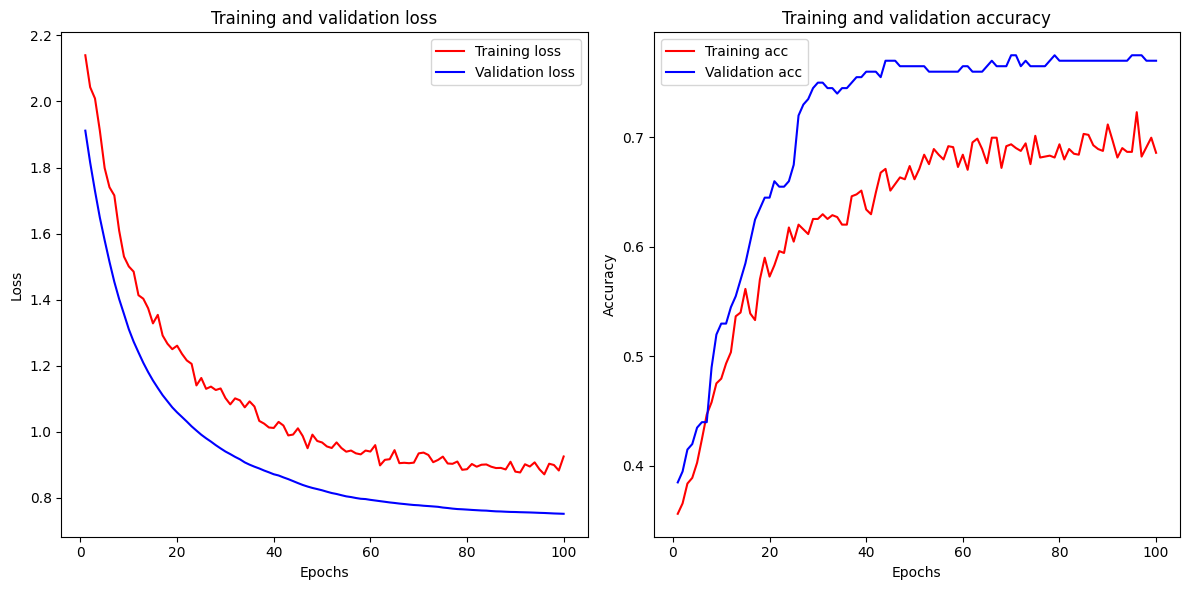

In [107]:
ModelUtilities.plot_training_history(history_dict)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


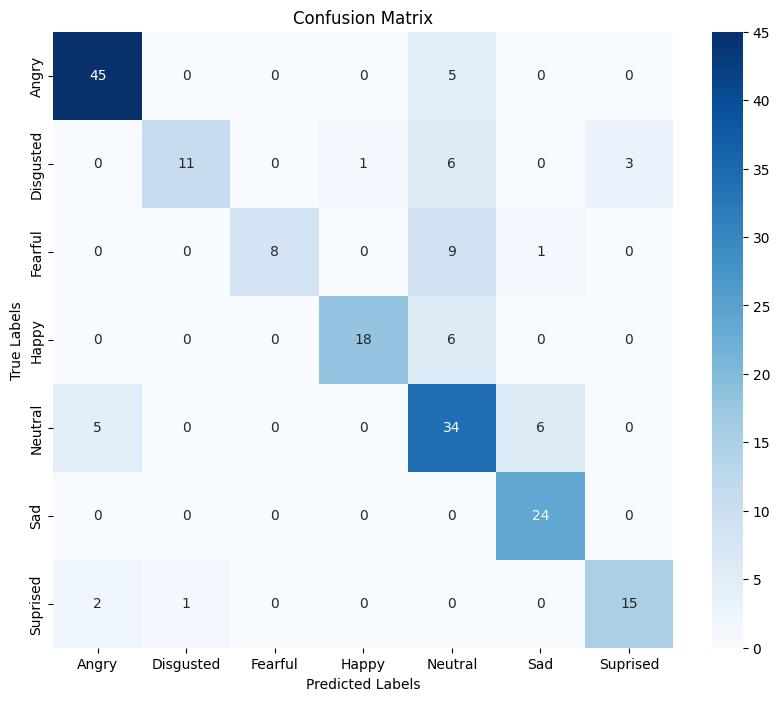

In [108]:
ModelUtilities.plot_confusion_matrix(cnn_model_statistics, x_valcnn, y_val, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


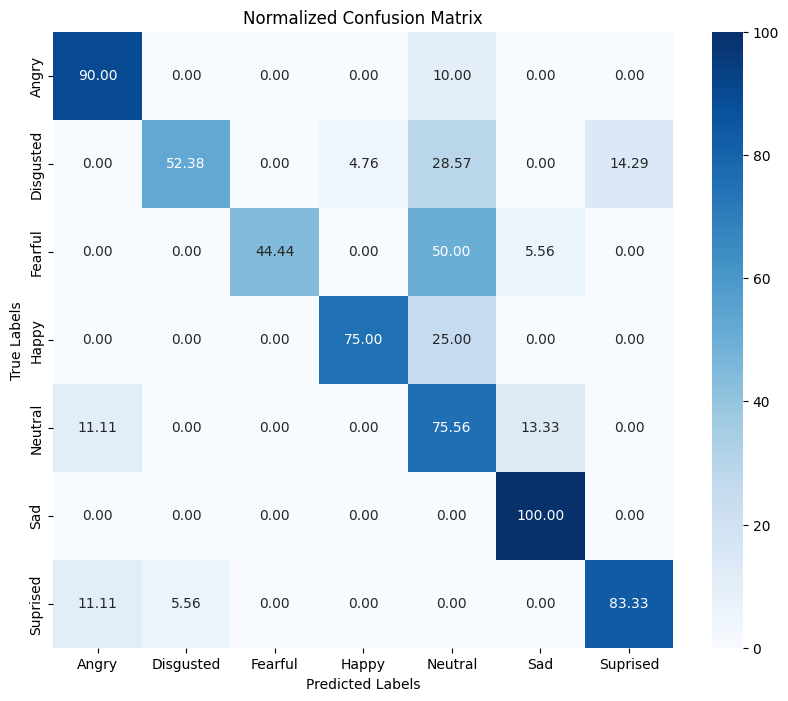

In [109]:
ModelUtilities.plot_confusion_matrix_normalized(cnn_model_statistics, x_valcnn, y_val, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

In [110]:
x_testcnn, y_test = DataUtils.prepare_data_for_test_model(test_file_path, scaler)

In [111]:
x_testcnn.shape

(150, 307, 1)

In [112]:
y_test.shape

(150, 7)

In [113]:
loss, accuracy = cnn_model_statistics.evaluate(x_testcnn, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7659 - loss: 0.8089 
Test Loss: 0.8737385869026184, Test Accuracy: 0.753333330154419


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


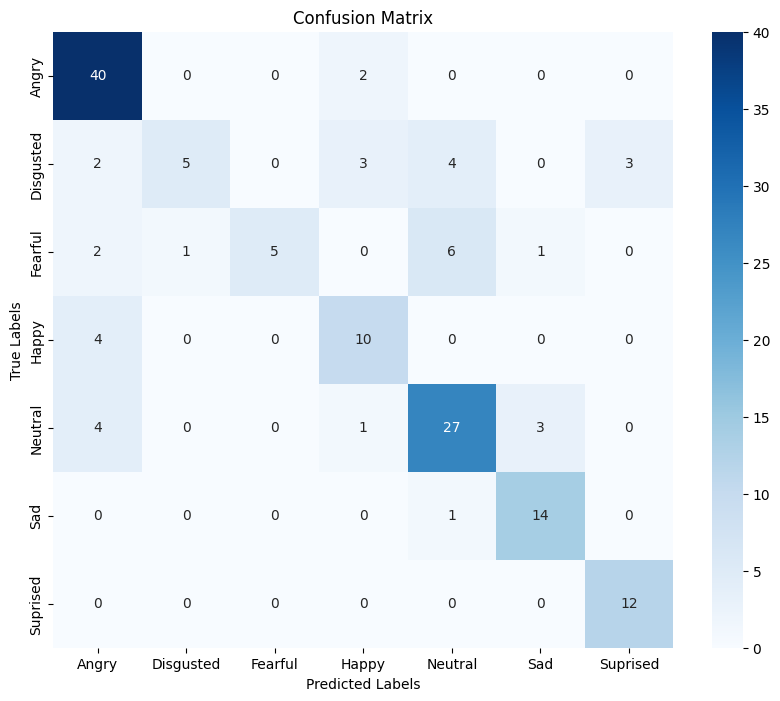

In [114]:
ModelUtilities.plot_confusion_matrix(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


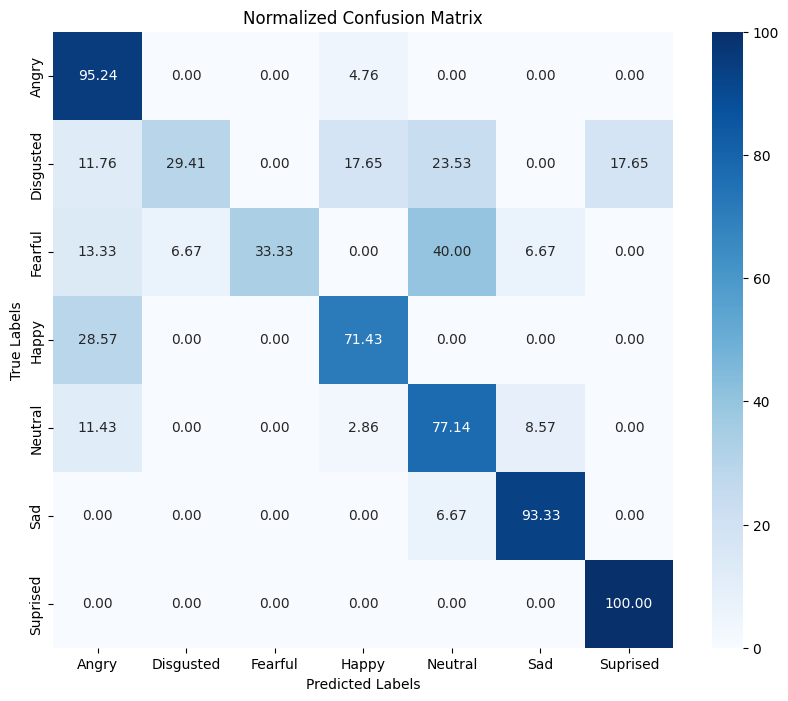

In [115]:
ModelUtilities.plot_confusion_matrix_normalized(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])